## The NBA module

There are many queries that we wish to do on the NBA data, so a module has been created to help.  Many of them perform queries to the database directly, others, query the database and then do operations on the resulting dataframes.  One can look at the code to examine how this is done.  However, this document shows many of the operations

In [1]:
using DataFrames, Chain
ENV["DATAFRAMES_ROWS"] = 10

10

Where the `ENV["DATAFRAMES_ROWS"] = 10` means that only show 10 rows of a dataframe (5 at the beginning and 5 at the end). 

In [31]:
using Revise, SQLite, BenchmarkTools
includet("NBA.jl")
using .NBA

The `getSeason` function gets the non-playoff NBA season for the given year.  If you are looking for the 2011-2012 season, put in 2012. Here's an example:

In [20]:
NBA.getSeason(2012)

Row,DATE,SEASON,VISITOR_TEAM,VISITOR_SCORE,HOME_TEAM,HOME_SCORE,OTS,PLAYOFF
,Date,Int64,String,Int64,String,Int64,Int64,String
1,2011-12-25,2012,Boston Celtics,104,New York Knicks,106,0,N
2,2011-12-25,2012,Miami Heat,105,Dallas Mavericks,94,0,N
3,2011-12-25,2012,Chicago Bulls,88,Los Angeles Lakers,87,0,N
4,2011-12-25,2012,Orlando Magic,89,Oklahoma City Thunder,97,0,N
5,2011-12-25,2012,Los Angeles Clippers,105,Golden State Warriors,86,0,N
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
986,2012-04-26,2012,Denver Nuggets,131,Minnesota Timberwolves,102,0,N
987,2012-04-26,2012,Portland Trail Blazers,94,Utah Jazz,96,0,N
988,2012-04-26,2012,Miami Heat,70,Washington Wizards,104,0,N


As we will see later, it is helpful to have the teams as ids (instead of names), so we set the `prettify` option to `false`:

In [21]:
NBA.getSeason(2000, prettify = false)

Row,GAME_ID,DATE_ID,VISITOR_ID,VISITOR_SCORE,HOME_ID,HOME_SCORE,OTS,PLAYOFF,DATE,SEASON
,Int64,Int64,Int64,Int64,Int64,Int64,Int64,String,String,Int64
1,35469,35469,70937,86,70938,100,0,N,1999-11-02,2000
2,35470,35469,70939,96,70940,108,0,N,1999-11-02,2000
3,35471,35469,70941,102,70942,107,1,N,1999-11-02,2000
4,35472,35469,70943,98,70944,93,0,N,1999-11-02,2000
5,35473,35469,70945,104,70946,92,0,N,1999-11-02,2000
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
1185,36653,36644,70956,100,70937,106,0,N,2000-04-19,2000
1186,36654,36644,70942,96,70959,95,0,N,2000-04-19,2000
1187,36655,36644,70957,98,70954,103,1,N,2000-04-19,2000


It is also helpful to get the entire season for a team using the `include_playoffs` option.  You can either get the team by name (full name like "Boston Celtics" or id  like 47).  

In [22]:
NBA.getSeason("Los Angeles Lakers",2000, prettify = false, include_playoffs = true)

Row,GAME_ID,DATE_ID,VISITOR_ID,VISITOR_SCORE,HOME_ID,HOME_SCORE,OTS,PLAYOFF,DATE,SEASON
,Int64,Int64,Int64,Int64,Int64,Int64,Int64,String,String,Int64
1,35479,35469,70957,91,70958,84,0,N,1999-11-02,2000
2,35485,35482,70960,88,70957,103,0,N,1999-11-03,2000
3,35510,35504,70957,82,70959,97,0,N,1999-11-06,2000
4,35514,35514,70940,97,70957,105,0,N,1999-11-07,2000
5,35524,35523,70957,123,70940,101,0,N,1999-11-09,2000
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
101,36728,36728,70949,104,70957,111,0,Y,2000-06-09,2000
102,36729,36729,70957,91,70949,100,0,Y,2000-06-11,2000
103,36730,36730,70957,120,70949,118,1,Y,2000-06-14,2000


Another helpful function is to go through all games for a season and calculate the regular season record.  As before one can either put in the team name or team_id. 

In [23]:
NBA.getRegularSeasonRecord("Dallas Mavericks",2010)

(W = 55, L = 27)

In [26]:
NBA.getRegularSeasonRecord(47648,1990)

(W = 59, L = 23)

As we have seen above, there are team_ids that are stored (and used) instead of team names.  Again, this is to make other operations easier and to improve storage. 

Each NBA team has a team_id for a given season.  The following shows how to look up the TEAM_ID for a given season.  

In [25]:
NBA.getTeams(1990, show_only_names = false)

Row,TEAM_ID,NAME
,Int64,String
1,47637,Indiana Pacers
2,47638,Atlanta Hawks
3,47639,Milwaukee Bucks
4,47640,Boston Celtics
5,47641,Washington Bullets
⋮,⋮,⋮
23,47659,Denver Nuggets
24,47660,Utah Jazz
25,47672,Orlando Magic


One can then also look up an entire season based on an TEAM_ID.  Note above, the id 47648 corresponds to the Detroit Piston.  And below we will use the id for the Orlando Magic. 

In [27]:
NBA.getSeason(47648,1990)

Row,DATE,SEASON,VISITOR_TEAM,VISITOR_SCORE,HOME_TEAM,HOME_SCORE,OTS,PLAYOFF
,Date,Int64,String,Int64,String,Int64,Int64,String
1,1989-11-03,1990,New York Knicks,103,Detroit Pistons,106,0,N
2,1989-11-04,1990,Detroit Pistons,95,Washington Bullets,93,0,N
3,1989-11-07,1990,Detroit Pistons,114,Chicago Bulls,117,0,N
4,1989-11-08,1990,Detroit Pistons,74,Indiana Pacers,95,0,N
5,1989-11-10,1990,Detroit Pistons,125,Orlando Magic,121,0,N
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
78,1990-04-13,1990,Atlanta Hawks,115,Detroit Pistons,111,0,N
79,1990-04-14,1990,Orlando Magic,107,Detroit Pistons,111,0,N
80,1990-04-19,1990,Philadelphia 76ers,107,Detroit Pistons,97,0,N


We can also just get a list of teams (as a `Vector`) by just using the year as an argument:

In [28]:
NBA.getTeams(1975)

18-element Vector{String}:
 "Atlanta Hawks"
 "Boston Celtics"
 "Buffalo Braves"
 "Chicago Bulls"
 "Cleveland Cavaliers"
 "Detroit Pistons"
 "Golden State Warriors"
 "Houston Rockets"
 "Kansas City-Omaha Kings"
 "Los Angeles Lakers"
 "Milwaukee Bucks"
 "New Orleans Jazz"
 "New York Knicks"
 "Philadelphia 76ers"
 "Phoenix Suns"
 "Portland Trail Blazers"
 "Seattle SuperSonics"
 "Washington Bullets"

Note: We have decided to give each team an separate id for each season.  This helps find the seasons that a give team played.  This lists all the "New Orleans Jazz" seasons. 

In [29]:
NBA.getSeasonsForTeam("New Orleans Jazz")

5-element Vector{Int64}:
 1975
 1976
 1977
 1978
 1979

Knowing a bit of history of the NBA, at the begining, it started with very few teams and has grown to its current number of 30.  We can make a list (`Vector`) of the number of teams bewtween 1955 and 2020 using:

In [30]:
num_teams = map(year -> length(NBA.getTeams(year)),1955:2020)

66-element Vector{Int64}:
  8
  8
  8
  8
  8
  8
  8
  9
  9
  9
  9
  9
 10
  ⋮
 30
 30
 30
 30
 30
 30
 30
 30
 30
 30
 30
 30

And a nice bar plot of this can be created as follows with the `Plots` package. Note: usually the first time a plotting command is called, it will take a while.  Subsequent calls are very fast.

In [18]:
using Plots

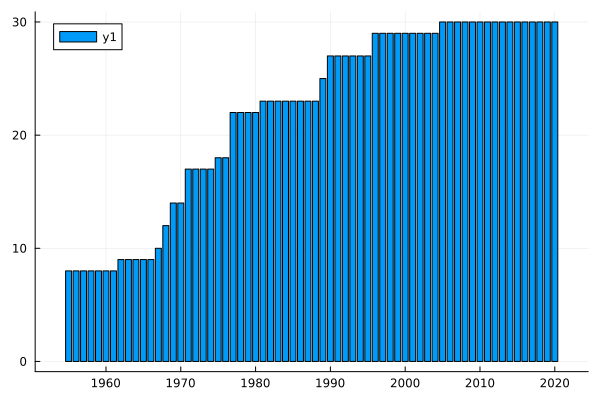

In [19]:
bar(1955:2020,num_teams)

### Same-Score Streaks

We now turn to same-score streaks, the primary focus of this project.  Although the code is in the `NBA.jl` module, we'll walk through how to do the using DataFrames with a simple example.  Let's say that we have a 10-game season and we'll start with a schedule created with a DataFrame for team 1. 

In [20]:
sched = DataFrame(
  DATE_ID = 1:10,
  SEASON = [1 for i=1:10],
  VISITOR_ID = [1,1,2,3,1,4,2,1,3,1],
  VISITOR_SCORE = [95,95,98,98,110,93,93,118,87,123],
  HOME_ID = [2,4,1,1,3,1,1,3,1,4],
  HOME_SCORE = [94,108,105,105,104,120,100,93,97,105]
)

Row,DATE_ID,SEASON,VISITOR_ID,VISITOR_SCORE,HOME_ID,HOME_SCORE
,Int64,Int64,Int64,Int64,Int64,Int64
1,1,1,1,95,2,94
2,2,1,1,95,4,108
3,3,1,2,98,1,105
4,4,1,3,98,1,105
5,5,1,1,110,3,104
6,6,1,4,93,1,120
7,7,1,2,93,1,100
8,8,1,1,118,3,93
9,9,1,3,87,1,97


A careful look at this shows that the 2nd and 3rd games form a same-score streak of order 2 because one team (team 1) has the same score in consecutive games (scoring 105 points) and the team's opponents have the same score (98). 

Although this is relatively easy in a 10-game season for a league with 4 teams, this only checks the schedule for team 1.  If we had the schedules for teams 2, 3 and 4, we could examine them as well.  Doing this by eye isn't reasonable for 65 years of a 8-30 team league.  We'll use this simple example to show how to use some techniques to do this by hand.

We can't use the standard DataFrame methods directly, because a check involves two consecutive rows.  Instead, we will create a new DataFrame that puts consecutive rows of the above DataFrame into a single row of the new one.  We'll do this by adding two new columns that are vectors of consecutive integers and shifted by 1 in each game. We'll call these `game_id1` and `game_id2`

In [21]:
sched.game_id1 = 0:9
sched.game_id2 = 1:10
sched

Row,DATE_ID,SEASON,VISITOR_ID,VISITOR_SCORE,HOME_ID,HOME_SCORE,game_id1,game_id2
,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64
1,1,1,1,95,2,94,0,1
2,2,1,1,95,4,108,1,2
3,3,1,2,98,1,105,2,3
4,4,1,3,98,1,105,3,4
5,5,1,1,110,3,104,4,5
6,6,1,4,93,1,120,5,6
7,7,1,2,93,1,100,6,7
8,8,1,1,118,3,93,7,8
9,9,1,3,87,1,97,8,9


Next, we will join this dataframe with itself and matching on the two `game_id`s will create pairs of consecutive games.

In [22]:
df2 = innerjoin(sched,sched, on= :game_id2 => :game_id1, makeunique = true)

Row,DATE_ID,SEASON,VISITOR_ID,VISITOR_SCORE,HOME_ID,HOME_SCORE,game_id1,game_id2,DATE_ID_1,SEASON_1,VISITOR_ID_1,VISITOR_SCORE_1,HOME_ID_1,HOME_SCORE_1,game_id2_1
,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64
1,1,1,1,95,2,94,0,1,2,1,1,95,4,108,2
2,2,1,1,95,4,108,1,2,3,1,2,98,1,105,3
3,3,1,2,98,1,105,2,3,4,1,3,98,1,105,4
4,4,1,3,98,1,105,3,4,5,1,1,110,3,104,5
5,5,1,1,110,3,104,4,5,6,1,4,93,1,120,6
6,6,1,4,93,1,120,5,6,7,1,2,93,1,100,7
7,7,1,2,93,1,100,6,7,8,1,1,118,3,93,8
8,8,1,1,118,3,93,7,8,9,1,3,87,1,97,9
9,9,1,3,87,1,97,8,9,10,1,1,123,4,105,10


There are a number of things to notice:
- Each row has the original score and team ids and the next score for the team.
- There are only 9 rows now.  Each row is a pair of games and there are 9 pairs of consecutive games.
- We used the option `makeunique = true` because without it there are errors because there are new columns with the same name (because we joined a DataFrame with itself). Otherwise, we could specify the names with the option `renamecols` as well. 

We will also use this options to make the column names easier to understand and drop some columns that are not needed:

In [23]:
@chain sched begin
  innerjoin(sched, on = :game_id2 => :game_id1, makeunique = true, renamecols = "1" => "2")
  select(Cols(Between(:VISITOR_ID1,:HOME_SCORE1),Between(:VISITOR_ID2,:HOME_SCORE2)))
end

Row,VISITOR_ID1,VISITOR_SCORE1,HOME_ID1,HOME_SCORE1,VISITOR_ID2,VISITOR_SCORE2,HOME_ID2,HOME_SCORE2
,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64
1,1,95,2,94,1,95,4,108
2,1,95,4,108,2,98,1,105
3,2,98,1,105,3,98,1,105
4,3,98,1,105,1,110,3,104
5,1,110,3,104,4,93,1,120
6,4,93,1,120,2,93,1,100
7,2,93,1,100,1,118,3,93
8,1,118,3,93,3,87,1,97
9,3,87,1,97,1,123,4,105


Lastly, we will filter the rows using the `subset` function to test if there is a score-streak.  Note, there are a few different ways to get a score streak
- Visitor 1 is the same as Visitor 2 and the scores match (visitor scores are equal and home scores are equal)
- Home 1 is the same as Home 2 and the scores match (visitor scores are equal and home scores are equal)
- Home 1 is the same as Visitor 2 and Home_Score1 equals Visitor_Score2 and Home_Score2 equals Visitor_Score1
- Visitor 1 is the same as Home 2 and Home_Score1 equals Visitor_Score2 and Home_Score2 equals Visitor_Score1

We can subset this with

In [24]:
@chain sched begin
  innerjoin(sched, on = :game_id2 => :game_id1, makeunique = true, renamecols = "1" => "2")
  select(Cols(Between(:VISITOR_ID1,:HOME_SCORE1),Between(:VISITOR_ID2,:HOME_SCORE2)))
  subset([:VISITOR_ID1, :VISITOR_SCORE1, :HOME_ID1, :HOME_SCORE1, :VISITOR_ID2, :VISITOR_SCORE2, :HOME_ID2, :HOME_SCORE2] => 
    (vid1,vsc1,hid1,hsc1,vid2,vsc2,hid2,hsc2)-> 
      (vsc1 .== vsc2 .&& hsc1 .== hsc2 .&& (vid1 .== vid2 .|| hid1 .== hid2)) .||
      (vsc1 .== hsc2 .&& hsc1 .== vsc2 .&& (vid1 .== hid2 .|| vid2 .== hid1))
    )
end

Row,VISITOR_ID1,VISITOR_SCORE1,HOME_ID1,HOME_SCORE1,VISITOR_ID2,VISITOR_SCORE2,HOME_ID2,HOME_SCORE2
,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64
1,2,98,1,105,3,98,1,105


And the resulting DataFrame shows the single pair of games that is a same score streak. We have created two functions to help with this.  The `buildPairs` takes a season from a single team and creates the dataframe with the pairs of games per row.  There there is a `filterOrder2` that build the order2 dataframe and then filters to find the order2 streaks. 

In [34]:
@chain sched begin
  NBA.buildPairs()
  subset(NBA.filterOrder2())
end

Row,SEASON,DATE_ID1,HOME_ID1,HOME_SCORE1,VISITOR_ID1,VISITOR_SCORE1,DATE_ID2,HOME_ID2,HOME_SCORE2,VISITOR_ID2,VISITOR_SCORE2
,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64
1,1,3,1,105,2,98,4,1,105,3,98


We can use this to find same-streaks in the historic data. 

To do this, we need to do the following
1. For a given year, find all of the teams that play in that season.
2. For each team, follow the steps above to see if there are any same score streaks.
3. For each year, repeat steps 1 and 2. 

This procedure requires that the two steps (build the pair then search for order-2 streak) needs to be done for every team in every year. 

Here's an example for the 2019 season

In [26]:
teams2019 = NBA.getTeams(2019)

30-element Vector{String}:
 "Atlanta Hawks"
 "Boston Celtics"
 "Brooklyn Nets"
 "Charlotte Hornets"
 "Chicago Bulls"
 "Cleveland Cavaliers"
 "Dallas Mavericks"
 "Denver Nuggets"
 "Detroit Pistons"
 "Golden State Warriors"
 "Houston Rockets"
 "Indiana Pacers"
 "Los Angeles Clippers"
 ⋮
 "New Orleans Pelicans"
 "New York Knicks"
 "Oklahoma City Thunder"
 "Orlando Magic"
 "Philadelphia 76ers"
 "Phoenix Suns"
 "Portland Trail Blazers"
 "Sacramento Kings"
 "San Antonio Spurs"
 "Toronto Raptors"
 "Utah Jazz"
 "Washington Wizards"

We get the regular season for the first team (Hawks), then build the pairs and search

In [31]:
@chain NBA.getSeason(teams2019[1],2019, prettify = false) begin
  NBA.buildPairs()
  subset(NBA.filterOrder2())
end

Row,SEASON,DATE_ID1,HOME_ID1,HOME_SCORE1,VISITOR_ID1,VISITOR_SCORE1,DATE_ID2,HOME_ID2,HOME_SCORE2,VISITOR_ID2,VISITOR_SCORE2
,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64


This shows that the Atlanta Hawks had no same-score streaks.

We can repeat this for the other 29 teams as well. Before showing all teams, let's try for the last team (knowing that the Washington Wizards had a same score streak). 

In [32]:
@chain NBA.getSeason(teams2019[30],2019, prettify = false) begin
  NBA.buildPairs()
  subset(NBA.filterOrder2())
end

Row,SEASON,DATE_ID1,HOME_ID1,HOME_SCORE1,VISITOR_ID1,VISITOR_SCORE1,DATE_ID2,HOME_ID2,HOME_SCORE2,VISITOR_ID2,VISITOR_SCORE2
,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64
1,2019,63075,124032,108,124025,113,63088,124032,108,124013,113


Now although this shows that there is a same-score streak, it is not very easy to look at.  There is a function `prettifyOrder` which will make this look nicer:

In [33]:
@chain NBA.getSeason(teams2019[30],2019, prettify = false) begin
  NBA.buildPairs()
  subset(NBA.filterOrder2())
  NBA.prettifyOrder2()
end

Row,SEASON,GAME_DATE1,HOME_TEAM1,HOME_SCORE1,VISITOR_TEAM1,VISITOR_SCORE1,GAME_DATE2,HOME_TEAM2,HOME_SCORE2,VISITOR_TEAM2,VISITOR_SCORE2
,Int64,String,String,Int64,String,Int64,String,String,Int64,String,Int64
1,2019,2019-03-21,Washington Wizards,108,Denver Nuggets,113,2019-03-23,Washington Wizards,108,Miami Heat,113


We have developed a function `order2Streaks` to find any streaks for a given team in a given season.

In [39]:
NBA.order2Streaks("Washington Wizards",2019)

Row,SEASON,DATE_ID1,HOME_ID1,HOME_SCORE1,VISITOR_ID1,VISITOR_SCORE1,DATE_ID2,HOME_ID2,HOME_SCORE2,VISITOR_ID2,VISITOR_SCORE2
,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64
1,2019,63075,124032,108,124025,113,63088,124032,108,124013,113


To do the entire 2019 season, we need to repeat this for all of the teams and append all of the DataFrames together

In [41]:
same_scores2019 = NBA.order2Streaks(teams2019[1],2019)
for i=2:length(teams2019)
  ss = NBA.order2Streaks(teams2019[i],2019)
  append!(same_scores2019,ss)
end
NBA.prettifyOrder2(same_scores2019)

Row,SEASON,GAME_DATE1,HOME_TEAM1,HOME_SCORE1,VISITOR_TEAM1,VISITOR_SCORE1,GAME_DATE2,HOME_TEAM2,HOME_SCORE2,VISITOR_TEAM2,VISITOR_SCORE2
,Int64,String,String,Int64,String,Int64,String,String,Int64,String,Int64
1,2019,2018-11-17,Brooklyn Nets,119,Los Angeles Clippers,127,2018-11-19,Atlanta Hawks,119,Los Angeles Clippers,127
2,2019,2019-03-21,Washington Wizards,108,Denver Nuggets,113,2019-03-23,Washington Wizards,108,Miami Heat,113
3,2019,2019-03-27,Chicago Bulls,98,Portland Trail Blazers,118,2019-03-29,Atlanta Hawks,98,Portland Trail Blazers,118


This shows that there were 3 order-2 streaks in the 2019 season.

And to further make this easier, we have a function to find all order-2 streaks for a season

In [44]:
NBA.prettifyOrder2(NBA.order2Streaks(2019))

Row,SEASON,GAME_DATE1,HOME_TEAM1,HOME_SCORE1,VISITOR_TEAM1,VISITOR_SCORE1,GAME_DATE2,HOME_TEAM2,HOME_SCORE2,VISITOR_TEAM2,VISITOR_SCORE2
,Int64,String,String,Int64,String,Int64,String,String,Int64,String,Int64
1,2019,2018-11-17,Brooklyn Nets,119,Los Angeles Clippers,127,2018-11-19,Atlanta Hawks,119,Los Angeles Clippers,127
2,2019,2019-03-21,Washington Wizards,108,Denver Nuggets,113,2019-03-23,Washington Wizards,108,Miami Heat,113
3,2019,2019-03-27,Chicago Bulls,98,Portland Trail Blazers,118,2019-03-29,Atlanta Hawks,98,Portland Trail Blazers,118


And this will find all order-2 streaks from 1955 to 2020

In [50]:
all_streaks = NBA.order2Streaks(1955)
for year=1956:2020
  append!(all_streaks,NBA.order2Streaks(year))
end
NBA.prettifyOrder2(all_streaks)

Row,SEASON,GAME_DATE1,HOME_TEAM1,HOME_SCORE1,VISITOR_TEAM1,VISITOR_SCORE1,GAME_DATE2,HOME_TEAM2,HOME_SCORE2,VISITOR_TEAM2,VISITOR_SCORE2
,Int64,String,String,Int64,String,Int64,String,String,Int64,String,Int64
1,1956,1955-12-31,Syracuse Nationals,101,New York Knicks,92,1956-01-01,New York Knicks,92,Rochester Royals,101
2,1966,1965-11-22,San Francisco Warriors,112,St. Louis Hawks,108,1965-11-24,Cincinnati Royals,112,St. Louis Hawks,108
3,1968,1967-11-18,Chicago Bulls,132,Detroit Pistons,130,1967-11-19,Seattle SuperSonics,132,Detroit Pistons,130
4,1968,1968-02-13,Chicago Bulls,114,San Diego Rockets,102,1968-02-14,New York Knicks,114,San Diego Rockets,102
5,1969,1969-01-16,Atlanta Hawks,112,Phoenix Suns,107,1969-01-17,Atlanta Hawks,112,Phoenix Suns,107
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
70,2016,2016-02-05,Brooklyn Nets,128,Sacramento Kings,119,2016-02-07,Boston Celtics,128,Sacramento Kings,119
71,2019,2018-11-17,Brooklyn Nets,119,Los Angeles Clippers,127,2018-11-19,Atlanta Hawks,119,Los Angeles Clippers,127
72,2019,2019-03-21,Washington Wizards,108,Denver Nuggets,113,2019-03-23,Washington Wizards,108,Miami Heat,113


And you can see that there are 74 same-score streaks in the span 1955-2020.

We will now make a plot of the number of streaks in a given year.  The following will do this in the following way:
1. Use `groupby` to group the above DataFrame by season
2. For each year, how many streaks are there. This will make a DataFrame where is row is a year with a non-zero number of streaks. 
  
  Note: comment out (with a #) all lines starting with rightjoin below to stop at this step. 
  
  We desire to come up with a dataframe (or an array) that includes 0 for the other years. Although many ways of doing this, here's a way to do this within the chain.

3. Join another DataFrame which is only a columns of zeros.  We use `rightjoin` because we way all rows of the right DataFrame (outerjoin will work as well).
4. This is now longer sorted, so sort
5. replace all of the missing values in the :nrow column with zeros then add num1 and num2

In [79]:
streaks_by_year = @chain all_streaks begin
  groupby(:SEASON)
  combine(nrow)
  rightjoin(DataFrame(SEASON=1955:2020,num2=0), on = :SEASON)
  sort(:SEASON)
  transform(:nrow => (n -> replace(n,missing => 0)) => :num1)
  select(:SEASON, [:num1, :num2] => ((n1,n2)->n1 .+ n2) => :num )
end

Row,SEASON,num
,Int64,Int64
1,1955,0
2,1956,1
3,1957,0
4,1958,0
5,1959,0
⋮,⋮,⋮
62,2016,2
63,2017,0
64,2018,0


And now let's plot the number of streaks.

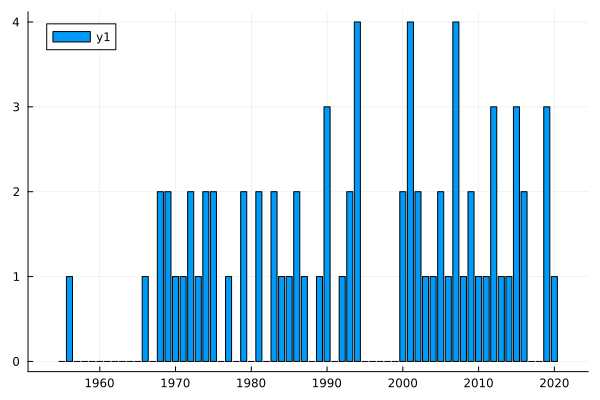

In [76]:
bar(1955:2020,streaks_by_year.num)

In [83]:
@chain all_streaks begin
  subset(:SEASON => s-> s.==2007)
  NBA.prettifyOrder2()
end

Row,SEASON,GAME_DATE1,HOME_TEAM1,HOME_SCORE1,VISITOR_TEAM1,VISITOR_SCORE1,GAME_DATE2,HOME_TEAM2,HOME_SCORE2,VISITOR_TEAM2,VISITOR_SCORE2
,Int64,String,String,Int64,String,Int64,String,String,Int64,String,Int64
1,2007,2006-11-10,Philadelphia 76ers,101,Denver Nuggets,108,2006-11-12,Charlotte Bobcats,101,Denver Nuggets,108
2,2007,2006-11-24,Phoenix Suns,99,New Jersey Nets,93,2006-11-26,Los Angeles Lakers,99,New Jersey Nets,93
3,2007,2006-12-22,New Orleans/Oklahoma City Hornets,100,Memphis Grizzlies,97,2006-12-23,Memphis Grizzlies,97,Utah Jazz,100
4,2007,2007-03-28,Dallas Mavericks,105,Milwaukee Bucks,103,2007-03-30,Dallas Mavericks,105,New York Knicks,103
